# **Space X  Falcon 9 First Stage Landing Prediction**


# 4. Machine Learning Predictions


* Encode the categorical variables
* Standardize the data
* Split into training data and test data
* Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
* Find the method performs best using test data

## 4.1. Import Librarie

In [1]:
import pandas as pd
import numpy as np

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn library
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## 4.2. Data Wrangling


### 4.2.1. Feature engineering

In [2]:
df = pd.read_csv('dataset_2.csv')
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,7951.639922,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [3]:
df_select = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Class']]
df_select.head(10)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,1,7951.639922,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0
5,6,3325.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1005,0
6,7,2296.000000,ISS,CCSFS SLC 40,1,False,False,True,NaN,1.0,0,B1006,1
7,8,1316.000000,LEO,CCSFS SLC 40,1,False,False,True,NaN,1.0,0,B1007,1
8,9,4535.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1008,0
9,10,4428.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1011,0


In [4]:
df_select.shape

(149, 13)

In [5]:
df_select.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
Class             int64
dtype: object

**Note:**
Need to encode 'object' type features, `Orbit`, `LaunchSite`, `LandingPad` and `Serial`.

In [6]:
print(df_select['Orbit'].unique())
print(df_select['Orbit'].nunique())

['LEO' 'ISS' 'PO' 'GTO' 'ES-L1' 'SSO' 'HEO' 'MEO' 'VLEO' 'SO' 'GEO' 'TLI']
12


In [7]:
print(df_select['LaunchSite'].unique())
print(df_select['LaunchSite'].nunique())

['CCSFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']
3


In [8]:
print(df_select['LandingPad'].unique())
print(df_select['LandingPad'].nunique())

[nan '5e9e3032383ecb761634e7cb' '5e9e3032383ecb6bb234e7ca'
 '5e9e3032383ecb267a34e7c7' '5e9e3033383ecbb9e534e7cc'
 '5e9e3032383ecb554034e7c9' '5e9e3033383ecb075134e7cd']
6


In [9]:
print(df_select['Serial'].unique())
print(df_select['Serial'].nunique())

['B0003' 'B0005' 'B0007' 'B1003' 'B1004' 'B1005' 'B1006' 'B1007' 'B1008'
 'B1011' 'B1010' 'B1012' 'B1013' 'B1015' 'B1016' 'B1018' 'B1019' 'B1017'
 'B1020' 'B1021' 'B1022' 'B1023' 'B1025' 'B1026' 'B1028' 'B1029' 'B1031'
 'B1030' 'B1032' 'B1034' 'B1035' 'B1036' 'B1037' 'B1039' 'B1038' 'B1040'
 'B1041' 'B1042' 'B1043' 'B1044' 'B1045' 'B1046' 'B1047' 'B1048' 'B1049'
 'B1050' 'B1054' 'B1051' 'B1056' 'B1059' 'B1058' 'B1060' 'B1062' 'B1061'
 'B1063' 'B1067' 'B1069' 'B1052' 'B1071' 'B1073']
60


In [10]:
# create dummy variables to categorical columns
df_encode = pd.get_dummies(data = df_select, columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
df_encode.head(10)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1073
0,1,7951.639922,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,3325.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,2296.000000,1,False,False,True,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,8,1316.000000,1,False,False,True,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,4535.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,4428.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Note:**
From column number, the encoding works properly and the original columns are removed from the data frame.

In [11]:
df_encode.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1063      uint8
Serial_B1067      uint8
Serial_B1069      uint8
Serial_B1071      uint8
Serial_B1073      uint8
Length: 90, dtype: object

In [12]:
df_encode.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Class', 'Orbit_ES-L1', 'Orbit_GEO',
       'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO',
       'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_TLI', 'Orbit_VLEO',
       'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecb075134e7cd',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1

### 4.2.2 X and Y creation

In [13]:
Y = df_encode['Class']
print(type(Y))
Y

<class 'pandas.core.series.Series'>


0      0
1      0
2      0
3      0
4      0
      ..
144    1
145    1
146    1
147    1
148    1
Name: Class, Length: 149, dtype: int64

In [14]:
X = df_encode.drop('Class', axis = 1)
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1073
0,1,7951.639922,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,13260.000000,5,True,True,True,5.0,6,0,0,...,0,0,0,0,0,1,0,0,0,0
145,146,13260.000000,1,True,False,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
146,147,13260.000000,5,True,True,True,5.0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
147,148,7951.639922,8,True,True,True,5.0,9,0,0,...,0,0,0,1,0,0,0,0,0,0


### 4.2.3. Train / Test split

In [15]:
# need to split the input data to train data for model building and test data for model evaluation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
print(X_train.shape)
print(X_test.shape)

(119, 89)
(30, 89)


In [17]:
print(Y_train.shape)
print(Y_test.shape)

(119,)
(30,)


### 4.2.4. Standardize X data


In [18]:
# use StandardScaler from sklearn.preprocessing

# use train data only for standards scaler fitting
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_train_ss

array([[ 0.37767254, -1.28013262, -0.82072699, ...,  0.        ,
        -0.09205746, -0.09205746],
       [ 0.91774032, -0.02763816,  1.58654618, ...,  0.        ,
        -0.09205746, -0.09205746],
       [-1.43038047, -0.65173494, -0.82072699, ...,  0.        ,
        -0.09205746, -0.09205746],
       ...,
       [-1.24253081, -1.12298511, -0.82072699, ...,  0.        ,
        -0.09205746, -0.09205746],
       [-0.06847041, -0.02763816,  0.21096151, ...,  0.        ,
        -0.09205746, -0.09205746],
       [-1.40689926, -1.08066877, -0.82072699, ...,  0.        ,
        -0.09205746, -0.09205746]])

In [19]:
# then apply the transform to test data
X_test_ss = ss.transform(X_test)
X_test_ss

array([[ 0.94122153, -0.02763816,  0.21096151, ...,  0.        ,
        -0.09205746, -0.09205746],
       [-0.6320194 , -1.48979086, -0.82072699, ...,  0.        ,
        -0.09205746, -0.09205746],
       [-1.68867376, -1.46093881, -0.82072699, ...,  0.        ,
        -0.09205746, -0.09205746],
       ...,
       [ 0.40115374,  1.44350102,  1.24265001, ...,  0.        ,
        -0.09205746, -0.09205746],
       [-1.2190496 , -0.67231607, -0.82072699, ...,  0.        ,
        -0.09205746, -0.09205746],
       [-0.70246303, -0.38533434, -0.82072699, ...,  0.        ,
        -0.09205746, -0.09205746]])

## 4.3. Model Building


### 4.3.1. Logistic regression with GridSearchCV


In [20]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['None', 'l2', 'l1', 'elasticnet'],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [21]:
# define logistic regression model
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

C:\Users\wfei2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wfei2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1],
                         'penalty': ['None', 'l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [22]:
# Output the best parameters for lr
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.925


In [23]:
# use the best parameters and calcualte the accuracy on test data
best_logreg_cv = logreg_cv.best_estimator_
logreg_cv.score(X_test, Y_test)

0.9333333333333333

In [24]:
# define a function to plot the confusion matrix for model evaluation
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

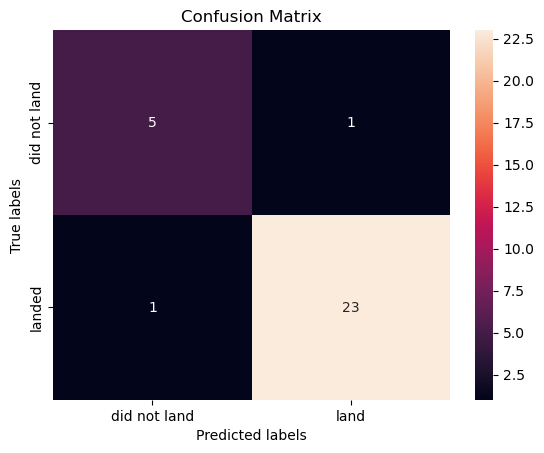

In [25]:
# plot the confusion matrix for lr on test data
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

**Note:**
* The accuracy is pretty good for both positive and negative predictions on test data. 
* Only one false negative and one false positive. 

### 4.3.2. Support Vector Machine with GridSearchCV


In [49]:
# create parameters and fit model
parameters = {'kernel':['rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
parameters

{'kernel': ['rbf', 'sigmoid'],
 'C': [0.1, 1, 10, 100, 1000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [50]:
# define svm and searching for the best parameters with train data
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']})

In [51]:
# # Output the best parameters for svm
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.7984848484848486


In [52]:
# use the best parameters and calcualte the accuracy on test data
best_svm_cv = svm_cv.best_estimator_
svm_cv.score(X_test, Y_test)

0.8

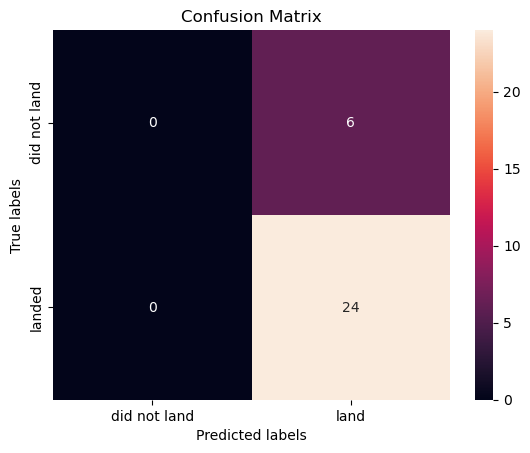

In [53]:
# plot the confusion matrix for svm on test data
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

**Note:**
SVM doesn't work well. All its predictions are positive.

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


### 4.3.3. Decision Tree with GridSearchCV

In [56]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
parameters

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [57]:
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

C:\Users\wfei2\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\wfei2\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\wfei2\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\wfei2\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [58]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9234848484848485


In [60]:
best_tree_cv = tree_cv.best_estimator_ 
print(best_tree_cv.score(X_test, Y_test))

0.8


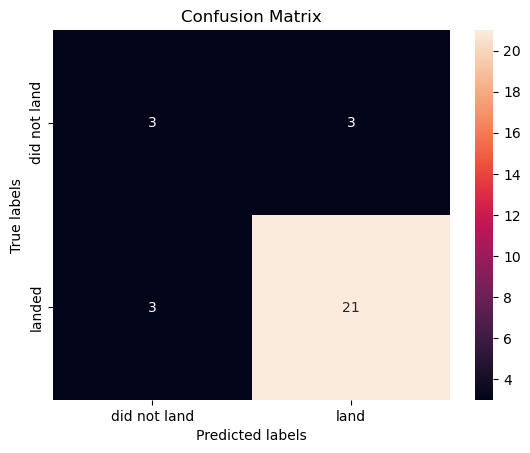

In [61]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,yhat)

array([[ 3,  3],
       [ 3, 21]], dtype=int64)

**Note:**
The tuned `Decision Tree` model works well on train data but not that good on test data.

### 4.3.4. K Nearest Neighbors with GridSearchCV

In [63]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

parameters

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'p': [1, 2]}

In [64]:
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [65]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8075757575757576


In [66]:
knn_cv.score(X_test, Y_test)

0.8

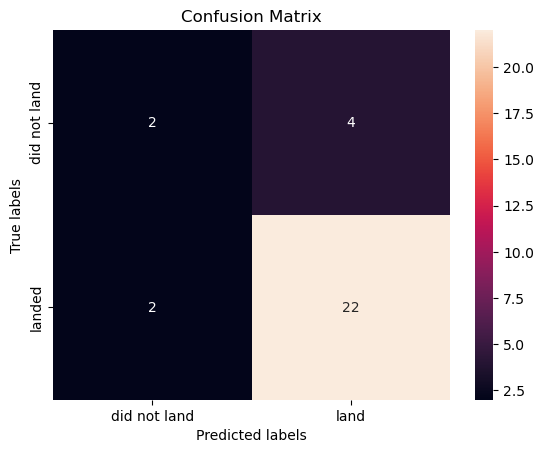

In [67]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

**Note:**
* KNN works similar for train data and test data.
* Accuracy is ~0.8, not as good as Logistic Regression.

## 4.4. Model Comparison

In [87]:
# create a table to show accuracy of each model
tbdata = {'model':['LogReg','SVM','Tree','KNN'], 
          'best accuracy on train': [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_],
          'corresponding accuracy on test': [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test)]}
df = pd.DataFrame(tbdata)
df.sort_values(by = 'corresponding accuracy on test', axis = 0, ascending = True, inplace = True)
print(df)
print('The mothod performs best is: Logistic Regression.' )

    model  best accuracy on train  corresponding accuracy on test
1     SVM                0.798485                        0.800000
2    Tree                0.923485                        0.800000
3     KNN                0.807576                        0.800000
0  LogReg                0.925000                        0.933333
The mothod performs best is: Logistic Regression.


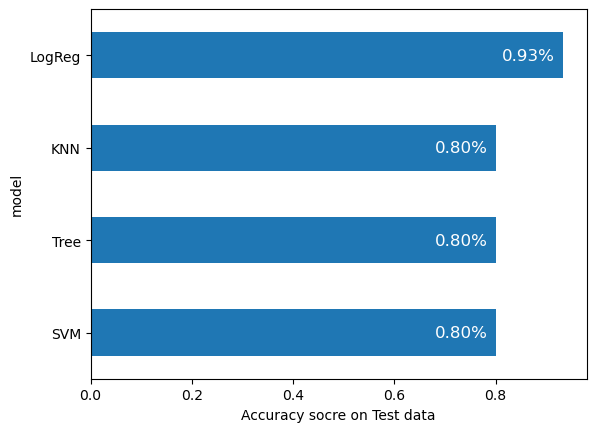

In [88]:
# plot the accuracy
df.plot(kind = 'barh', x = 'model', y = 'corresponding accuracy on test', legend = None)

for index, value in enumerate(df['corresponding accuracy on test']):
    label = '{0:.2f}%'.format(value)
    plt.annotate(label, xy = (value-0.12, index-0.05), color = 'white', fontsize = 12)

plt.xlabel('Accuracy socre on Test data')
plt.show()

# 5. Conclusion
* We can use the tuned Logistic Regression Model to predict the land outcome of next SpaceX Falcon 9 rocket launch.
* If the outcome is positive, the cost will be ~ 62 million dollars.
* If the outcome is negative, the cost will be ~ 165 million dollars.
* To outbid SpaceX, need to offer a little lower or same as the estimated cost.
* Looks like SpaceX has largely improved their success landing rate over years. It is very likely they will be able to use the first stage for next launch.